# 시작

In [ ]:

# 모듈 불러오기
import matplotlib as mpl 
import matplotlib.pyplot as plt 
import matplotlib.font_manager as fm  
import seaborn as sns
import pandas as pd
import numpy as np

# 폰트조절

from matplotlib import font_manager, rc
f_path = "c:/Windows/Fonts/malgun.ttf"
font_name = font_manager.FontProperties(fname=f_path).get_name()
rc('font', family=font_name)  

In [ ]:
# 철강공장데이터 불러오기
data = pd.read_csv('steel_data.csv')
data.head()

,Unnamed: 0.1,Unnamed: 0,PLATE_NO,ROLLING_DATE,SCALE,SPEC,STEEL_KIND,PT_THK,PT_WDTH,PT_LTH,...,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,ROLLING_TEMP_T5,HSB,ROLLING_DESCALING,WORK_GR
0,0,0,PB562774,2008-08-01 00:00:15,양품,AB/EH32-TM,T1,32.25,3707,15109,...,1144,116,1133,59,282,1133,934,적용,8,2조
1,1,1,PB562775,2008-08-01 00:00:16,양품,AB/EH32-TM,T1,32.25,3707,15109,...,1144,122,1135,53,283,1135,937,적용,8,2조
2,2,2,PB562776,2008-08-01 00:00:59,양품,NV-E36-TM,T8,33.27,3619,19181,...,1129,116,1121,55,282,1121,889,적용,8,3조
3,3,3,PB562777,2008-08-01 00:01:24,양품,NV-E36-TM,T8,33.27,3619,19181,...,1152,125,1127,68,316,1127,885,적용,8,3조
4,4,4,PB562778,2008-08-01 00:01:44,양품,BV-EH36-TM,T8,38.33,3098,13334,...,1140,134,1128,48,314,1128,873,적용,8,1조


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0.1       720 non-null    int64  
 1   Unnamed: 0         720 non-null    int64  
 2   PLATE_NO           720 non-null    object 
 3   ROLLING_DATE       720 non-null    object 
 4   SCALE              720 non-null    object 
 5   SPEC               720 non-null    object 
 6   STEEL_KIND         720 non-null    object 
 7   PT_THK             720 non-null    float64
 8   PT_WDTH            720 non-null    int64  
 9   PT_LTH             720 non-null    int64  
 10  PT_WGT             720 non-null    int64  
 11  FUR_NO             720 non-null    object 
 12  FUR_NO_ROW         720 non-null    int64  
 13  FUR_HZ_TEMP        720 non-null    int64  
 14  FUR_HZ_TIME        720 non-null    int64  
 15  FUR_SZ_TEMP        720 non-null    int64  
 16  FUR_SZ_TIME        720 non

In [ ]:
#필요없는 데이터 제거
data = data.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis = 1)

In [ ]:
data.head()

,PLATE_NO,ROLLING_DATE,SCALE,SPEC,STEEL_KIND,PT_THK,PT_WDTH,PT_LTH,PT_WGT,FUR_NO,...,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,ROLLING_TEMP_T5,HSB,ROLLING_DESCALING,WORK_GR
0,PB562774,2008-08-01 00:00:15,양품,AB/EH32-TM,T1,32.25,3707,15109,14180,1호기,...,1144,116,1133,59,282,1133,934,적용,8,2조
1,PB562775,2008-08-01 00:00:16,양품,AB/EH32-TM,T1,32.25,3707,15109,14180,1호기,...,1144,122,1135,53,283,1135,937,적용,8,2조
2,PB562776,2008-08-01 00:00:59,양품,NV-E36-TM,T8,33.27,3619,19181,18130,2호기,...,1129,116,1121,55,282,1121,889,적용,8,3조
3,PB562777,2008-08-01 00:01:24,양품,NV-E36-TM,T8,33.27,3619,19181,18130,2호기,...,1152,125,1127,68,316,1127,885,적용,8,3조
4,PB562778,2008-08-01 00:01:44,양품,BV-EH36-TM,T8,38.33,3098,13334,12430,3호기,...,1140,134,1128,48,314,1128,873,적용,8,1조


# 총 불량율 확인

In [ ]:
data.groupby(['SCALE'], as_index = False).agg(scale_count = ('SCALE', 'count'))


,SCALE,scale_count
0,불량,231
1,양품,489


In [ ]:
print(f'불량율은 {231/(231+489)} 입니다.')

불량율은 0.32083333333333336 입니다.


<AxesSubplot:xlabel='SCALE', ylabel='count'>

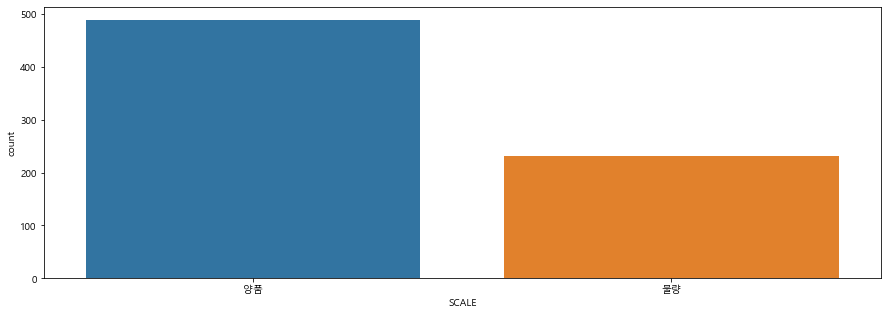

In [ ]:
plt.figure(figsize = ( 15, 5))
sns.countplot(data = data, x = 'SCALE')

# 각 항목별 상관관계 확인

## PLATE_NO

In [ ]:
# 플렌트별 두께 카운트
data.groupby(['PT_THK']).count()['PLATE_NO'].sort_values(ascending = False)

PT_THK
13.06    39
20.10    39
16.09    33
40.35    32
12.05    29
         ..
19.62     1
50.19     1
19.42     1
24.18     1
12.03     1
Name: PLATE_NO, Length: 152, dtype: int64

In [ ]:
# 플렌트별 제작일자 카운트
data.groupby(['ROLLING_DATE']).count()['PLATE_NO']

ROLLING_DATE
2008-08-01 00:00:15    1
2008-08-01 00:00:16    1
2008-08-01 00:00:59    1
2008-08-01 00:01:24    1
2008-08-01 00:01:44    1
                      ..
2008-08-02 13:35:24    1
2008-08-02 13:35:36    1
2008-08-02 14:40:00    1
2008-08-02 14:40:33    1
2008-08-02 14:40:53    1
Name: PLATE_NO, Length: 704, dtype: int64

In [ ]:
# 플렌트별 스펙 카운트
data.groupby(['SPEC']).count()['PLATE_NO'].sort_values(ascending = False)

SPEC
JS-SM490YB     84
LR-A           54
NV-A           48
PILAC-BT33     40
BV-EH36-TM     35
               ..
CCS-B           1
LR-AH36-TM      1
LR-AH36         1
KR-B            1
A131-DH36TM     1
Name: PLATE_NO, Length: 66, dtype: int64

In [ ]:
# 플렌트별 ROLLING_DESCALING 카운트
data.groupby(['ROLLING_DESCALING']).count()['PLATE_NO'].sort_values(ascending = False)

ROLLING_DESCALING
10    296
8     208
6     176
9      20
7      15
5       5
Name: PLATE_NO, dtype: int64

In [ ]:
# 플렌트별 HSB적용유무 카운트
data.groupby(['HSB']).count()['PLATE_NO']

HSB
미적용     33
적용     687
Name: PLATE_NO, dtype: int64

In [ ]:
# 플렌트별 생산시설 카운트
data.groupby(['FUR_NO']).count()['PLATE_NO']

FUR_NO
1호기    240
2호기    237
3호기    243
Name: PLATE_NO, dtype: int64

In [ ]:
# 플렌트별 불량 카운트
data.groupby(['SCALE']).count()['PLATE_NO']

SCALE
불량    231
양품    489
Name: PLATE_NO, dtype: int64

In [ ]:
# 플렌트별 종류 카운트
data.groupby(['STEEL_KIND']).count()['PLATE_NO'].sort_values(ascending = False)

STEEL_KIND
C0    503
T8     95
T5     43
T7     35
T1     18
T0     16
C3      7
T3      2
C1      1
Name: PLATE_NO, dtype: int64

## WORK_GR

In [ ]:
# 작업그룹별 불량 카운트
data.groupby(['WORK_GR','SCALE'], as_index = False).agg(count = ('PLATE_NO', 'count')) 

,WORK_GR,SCALE,count
0,1조,불량,67
1,1조,양품,122
2,2조,불량,45
3,2조,양품,120
4,3조,불량,54
5,3조,양품,118
6,4조,불량,65
7,4조,양품,129


([<matplotlib.patches.Wedge at 0x213e102df40>,
 [Text(-0.9870649480893087, -0.4854923153392345, '양품'),
  Text(0.9870649935443756, 0.4854922229235417, '불량')],
 [Text(-0.5383990625941683, -0.26481399018503693, '64.6%'),
  Text(0.5383990873878411, 0.26481393977647727, '35.4%')])

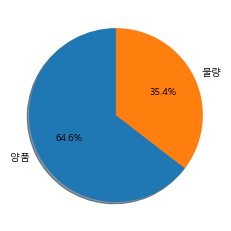

In [ ]:
# 1조 불량/양품 비율
label = ['양품', '불량']
pop = [122, 67]
wg = {'edgecolor' : 'B'}
plt.pie(pop, labels = label, autopct = '%.1f%%',shadow = True, startangle = 90)

([<matplotlib.patches.Wedge at 0x213e1081490>,
 [Text(-0.8313244827396928, -0.7203468639465174, '양품'),
  Text(0.8313244152959488, 0.7203469417807291, '불량')],
 [Text(-0.45344971785801425, -0.3929164712435549, '72.7%'),
  Text(0.4534496810705174, 0.39291651369857944, '27.3%')])

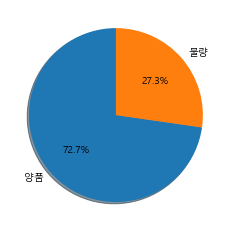

In [ ]:
# 2조 불량/양품 비율
label = ['양품', '불량']
pop = [120, 45]
wg = {'edgecolor' : 'B'}
plt.pie(pop, labels = label, autopct = '%.1f%%',shadow = True, startangle = 90)

([<matplotlib.patches.Wedge at 0x213e10cbd30>,
 [Text(-0.9173975441741562, -0.6069445987429392, '양품'),
  Text(0.9173974873478977, 0.6069446846358932, '불량')],
 [Text(-0.5003986604586306, -0.33106069022342133, '68.6%'),
  Text(0.5003986294624896, 0.3310607370741236, '31.4%')])

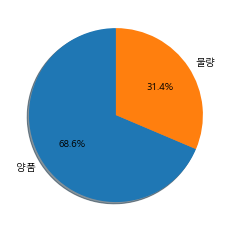

In [ ]:
# 3조 불량/양품 비율
label = ['양품', '불량']
pop = [118, 54]
wg = {'edgecolor' : 'B'}
plt.pie(pop, labels = label, autopct = '%.1f%%',shadow = True, startangle = 90)

([<matplotlib.patches.Wedge at 0x213e1120430>,
 [Text(-0.9555828933410935, -0.5448498269742448, '양품'),
  Text(0.9555828933410935, 0.5448498269742447, '불량')],
 [Text(-0.5212270327315055, -0.2971908147132244, '66.5%'),
  Text(0.5212270327315055, 0.29719081471322434, '33.5%')])

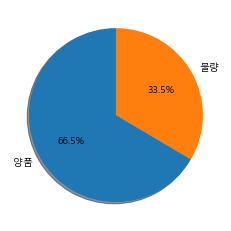

In [ ]:
# 4조 불량/양품 비율
label = ['양품', '불량']
pop = [129, 65]
wg = {'edgecolor' : 'B'}
plt.pie(pop, labels = label, autopct = '%.1f%%',shadow = True, startangle = 90)

([<matplotlib.patches.Wedge at 0x213de760e80>,
 [Text(-0.776567188268389, 0.7790657238673312, '1조'),
  Text(-0.7914373790693034, -0.7639547597940023, '2조'),
  Text(0.7302483959551906, -0.8226404319050159, '3조'),
  Text(0.8108060619390568, 0.7433663497380537, '4조')],
 [Text(-0.4235821026918485, 0.4249449402912715, '24.9%'),
  Text(-0.43169311585598363, -0.416702596251274, '24.5%'),
  Text(0.39831730688464945, -0.4487129628572814, '24.1%'),
  Text(0.4422578519667582, 0.4054725544025747, '26.4%')])

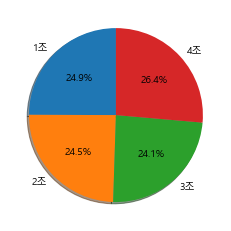

In [ ]:
# 작업그룹 양품률 비율
label = ['1조', '2조','3조','4조']
pop = [122, 120,118,129]
wg = {'edgecolor' : 'B'}
plt.pie(pop, labels = label, autopct = '%.1f%%',shadow = True, startangle = 90)

([<matplotlib.patches.Wedge at 0x213de610700>,
 [Text(-0.8692622055449338, 0.6740795338913333, '1조'),
  Text(-0.7146771926949856, -0.8362036296510644, '2조'),
  Text(0.6562075928985752, -0.882831577948058, '3조'),
  Text(0.8506080464250692, 0.697471111485578, '4조')],
 [Text(-0.4741430212063275, 0.3676797457589091, '29.0%'),
  Text(-0.38982392328817395, -0.45611107071876233, '19.5%'),
  Text(0.3579314143083137, -0.481544497062577, '23.4%'),
  Text(0.46396802532276493, 0.38043878808304255, '28.1%')])

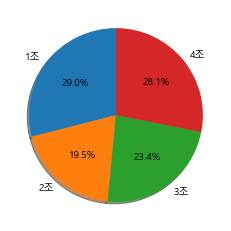

In [ ]:
# 작업그룹 불량률 비율
label = ['1조', '2조','3조','4조']
pop = [67, 45,54,65]
wg = {'edgecolor' : 'B'}
plt.pie(pop, labels = label, autopct = '%.1f%%',shadow = True, startangle = 90)

In [ ]:
# 작업그룹별 종류 카운트
data.groupby(['WORK_GR','STEEL_KIND'], as_index = False).agg(count = ('PLATE_NO', 'count'))


,WORK_GR,STEEL_KIND,count
0,1조,C0,130
1,1조,C3,2
2,1조,T0,5
3,1조,T1,6
4,1조,T3,1
5,1조,T5,12
6,1조,T7,9
7,1조,T8,24
8,2조,C0,114
9,2조,C3,3


([<matplotlib.patches.Wedge at 0x213de6396d0>,
 [Text(-0.7950743136073097, -0.7601689521690986, 'C0'),
  Text(1.0840419024669055, 0.18668999356133748, 'T5'),
  Text(0.9391915050861395, 0.5726423986870272, 'T7'),
  Text(0.4594045308713934, 0.9994735999589159, 'T8')],
 [Text(-0.43367689833125983, -0.41463761027405377, '74.3%'),
  Text(0.5912955831637666, 0.10183090557891133, '6.9%'),
  Text(0.5122862755015305, 0.31235039928383296, '5.1%'),
  Text(0.25058428956621454, 0.5451674181594086, '13.7%')])

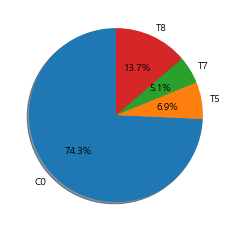

In [ ]:
# 1조
label = ['C0','T5','T7','T8']
pop = [130, 12,9,24]
wg = {'edgecolor' : 'B'}
plt.pie(pop, labels = label, autopct = '%.1f%%',shadow = True, startangle = 90)

([<matplotlib.patches.Wedge at 0x213de752ee0>,
 [Text(-0.8012507129092848, -0.7536559527147403, 'C0'),
  Text(1.0942827676377647, 0.11200546616587186, 'T5'),
  Text(0.9707736438888698, 0.5172992676688476, 'T7'),
  Text(0.4569563162913633, 1.0005952853184088, 'T8')],
 [Text(-0.4370458434050644, -0.411085065117131, '74.0%'),
  Text(0.5968815096205988, 0.0610938906359301, '5.2%'),
  Text(0.5295128966666561, 0.2821632369102805, '7.1%'),
  Text(0.24924889979528905, 0.5457792465373138, '13.6%')])

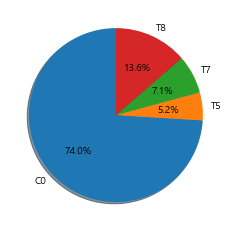

In [ ]:
# 2조
label = ['C0','T5','T7','T8']
pop = [114, 8,11,21]
wg = {'edgecolor' : 'B'}
plt.pie(pop, labels = label, autopct = '%.1f%%',shadow = True, startangle = 90)

([<matplotlib.patches.Wedge at 0x213def409d0>,
 [Text(-0.8032977240636585, -0.751473729756501, 'C0'),
  Text(1.0915866810609334, 0.13578850367529743, 'T5'),
  Text(0.9526278969593892, 0.5500000817588407, 'T7'),
  Text(0.4474101882083746, 1.0049000564669837, 'T8')],
 [Text(-0.4381623949438137, -0.4098947616853641, '73.9%'),
  Text(0.5954109169423272, 0.07406645655016222, '6.1%'),
  Text(0.5196152165233031, 0.3000000445957313, '6.7%'),
  Text(0.24404192084093157, 0.5481273035274455, '13.3%')])

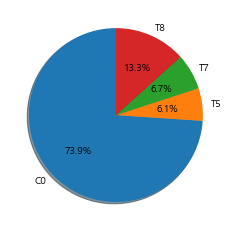

In [ ]:
# 3조
label = ['C0','T5','T7','T8']
pop = [122, 10,11,22]
wg = {'edgecolor' : 'B'}
plt.pie(pop, labels = label, autopct = '%.1f%%',shadow = True, startangle = 90)

([<matplotlib.patches.Wedge at 0x213defa75e0>,
 [Text(-0.7909838683324282, -0.7644243062840611, 'C0'),
  Text(1.0974356596313124, 0.07506645702033966, 'T0'),
  Text(1.016267564587097, 0.42095158530193283, 'T5'),
  Text(0.5060717502323755, 0.9766736320883963, 'T8')],
 [Text(-0.43144574636314265, -0.41695871251857874, '74.5%'),
  Text(0.5986012688898067, 0.040945340192912544, '3.3%'),
  Text(0.554327762502053, 0.22960995561923606, '7.1%'),
  Text(0.27603913649038664, 0.5327310720482161, '15.2%')])

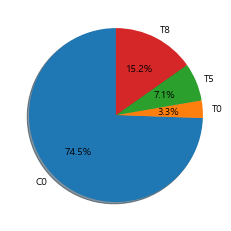

In [ ]:
# 4조
label = ['C0', 'T0','T5','T8']
pop = [137, 6,13,28]
wg = {'edgecolor' : 'B'}
plt.pie(pop, labels = label, autopct = '%.1f%%',shadow = True, startangle = 90)

([<matplotlib.patches.Wedge at 0x213deffefd0>,
 [Text(-0.7981876527533605, 0.7568992475832441, '1조'),
  Text(-0.7934446423529133, -0.7618698048364023, '2조'),
  Text(0.681610232140773, -0.8633698462657828, '3조'),
  Text(0.8305059217511634, 0.7212904504679446, '4조')],
 [Text(-0.43537508332001473, 0.41285413504540586, '25.8%'),
  Text(-0.43278798673795266, -0.41556534809258305, '22.7%'),
  Text(0.3717873993495125, -0.4709290070540633, '24.3%'),
  Text(0.4530032300460891, 0.393431154800697, '27.2%')])

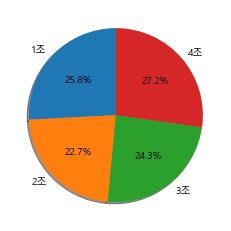

In [ ]:
# 작업 그룹에 따른 C0 사용 비율
label = ['1조', '2조','3조','4조']
pop = [130 ,114, 122, 137]
wg = {'edgecolor' : 'B'}
plt.pie(pop, labels = label, autopct = '%.1f%%',shadow = True, startangle = 90)

<AxesSubplot:xlabel='WORK_GR', ylabel='count'>

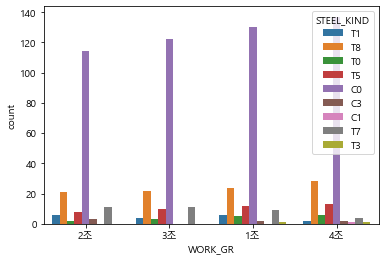

In [ ]:
# 작업그룹별 종류 카운트
sns.countplot(data = data, x= 'WORK_GR',hue = 'STEEL_KIND')

## HSB

In [ ]:
# HSB적용유무에 따른 불량 카운트
data_spec = data.groupby(['SCALE','HSB'], as_index = False).agg(count = ('SCALE', 'count'))
data_spec 

,SCALE,HSB,count
0,불량,미적용,33
1,불량,적용,198
2,양품,적용,489


<AxesSubplot:xlabel='SCALE', ylabel='count'>

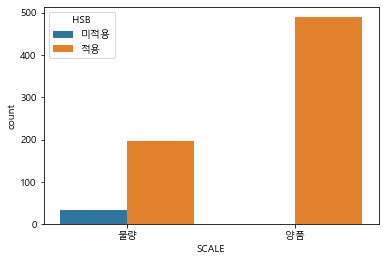

In [ ]:
sns.barplot(data=data_spec, x='SCALE', y='count', hue='HSB')

## ROLLING_DESCALING

In [ ]:
# ROLLING_DESCALING작업횟수별 불량 카운트
data_roll = data.groupby(['SCALE','ROLLING_DESCALING'], as_index = False).agg(count = ('SCALE', 'count'))
data_roll

,SCALE,ROLLING_DESCALING,count
0,불량,5,5
1,불량,6,26
2,불량,7,15
3,불량,8,99
4,불량,9,20
5,불량,10,66
6,양품,6,150
7,양품,8,109
8,양품,10,230


<AxesSubplot:xlabel='SCALE', ylabel='count'>

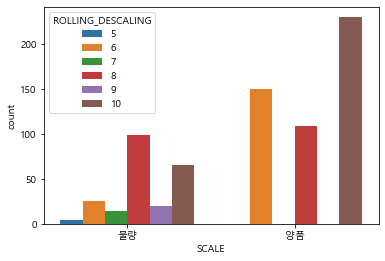

In [ ]:
sns.barplot(data=data_roll, x='SCALE', y='count', hue='ROLLING_DESCALING')

## ROLLING_TEMP

In [ ]:
# 롤링온도별 불량 카운트
data_roll2 = data.groupby(['SCALE','ROLLING_TEMP_T5'], as_index = False).agg(count = ('SCALE', 'count'))
data_roll2

,SCALE,ROLLING_TEMP_T5,count
0,불량,811,1
1,불량,812,1
2,불량,818,1
3,불량,820,1
4,불량,846,1
...,...,...,...
280,양품,996,3
281,양품,997,4
282,양품,998,4
283,양품,999,4


<AxesSubplot:xlabel='ROLLING_TEMP', ylabel='count'>

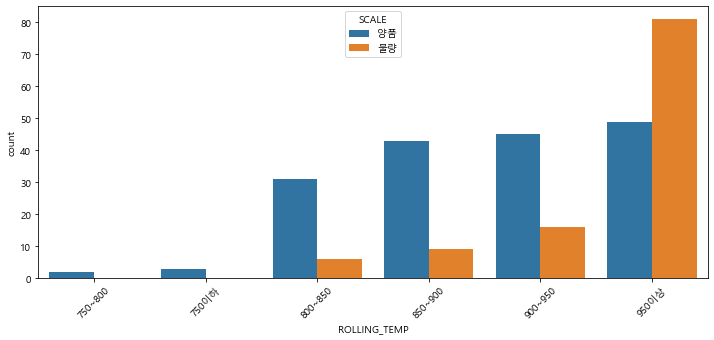

In [ ]:
def Total_1(data_roll2):
    
    if data_roll2 < 750:        
        return '750이하'
    elif data_roll2 < 800:
        return '750~800'
    elif data_roll2 < 850:
        return '800~850'
    elif data_roll2 < 900:
        return '850~900'
    elif data_roll2 < 950:
        return '900~950'
    else:
        return '950이상'
plt.rc('font', family='Malgun Gothic')    # 한글 폰트수정
plt.figure(figsize = (12, 5))  # 피규어 사이즈 확장 
plt.xticks(rotation=45)  # x라벨이 겹쳐서 글자 회전
data_roll2['ROLLING_TEMP'] = data_roll2['ROLLING_TEMP_T5'].apply(Total_1)
sns.countplot(data = data_roll2.sort_values(by = 'ROLLING_TEMP'), x='ROLLING_TEMP', hue = 'SCALE')

## ROLLING_DATE 

In [ ]:
# 제작일자별 불량 카운트
data['ROLLING_DATE'] = pd.to_datetime(data['ROLLING_DATE'])
data['time'] = data['ROLLING_DATE'].dt.strftime('%m%d_%H')
date_time = data

date_time_n = date_time.groupby(['time','SCALE'], as_index = False).agg(count = ('time', 'count'))
date_time_n

,time,SCALE,count
0,0801_00,불량,2
1,0801_00,양품,14
2,0801_01,양품,16
3,0801_02,양품,17
4,0801_03,불량,1
...,...,...,...
65,0802_12,불량,3
66,0802_12,양품,20
67,0802_13,불량,2
68,0802_13,양품,19


<AxesSubplot:xlabel='time', ylabel='count'>

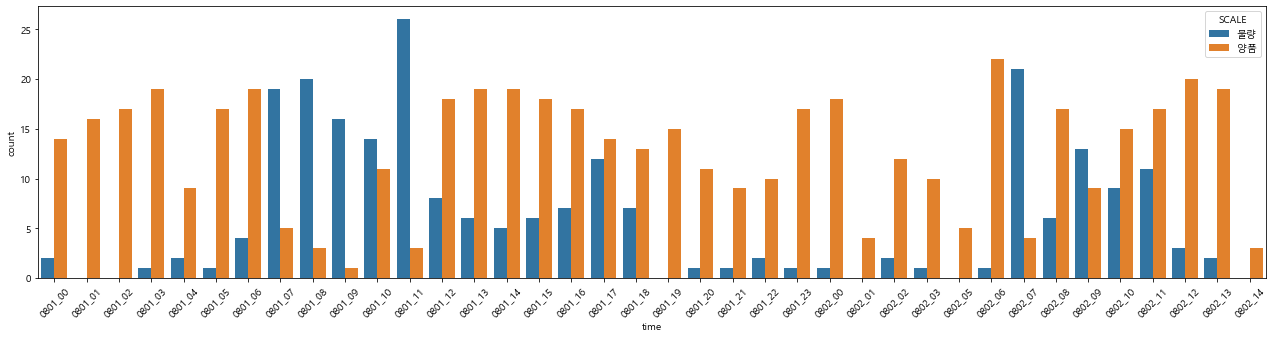

In [ ]:
plt.figure(figsize =(22,5)) 
plt.xticks(rotation = 45)
sns.barplot(data = date_time_n, x = 'time' , y = 'count' , hue = 'SCALE')

In [ ]:
# 제작일자별 종류 카운트
data['ROLLING_DATE'] = pd.to_datetime(data['ROLLING_DATE'])
data['time'] = data['ROLLING_DATE'].dt.strftime('%m%d_%H')
date_time = data

date_time_n = date_time.groupby(['time','STEEL_KIND'], as_index = False).agg(count = ('time', 'count'))
date_time_C0 = date_time_n[date_time_n['STEEL_KIND'] == 'C0']

<AxesSubplot:xlabel='time', ylabel='count'>

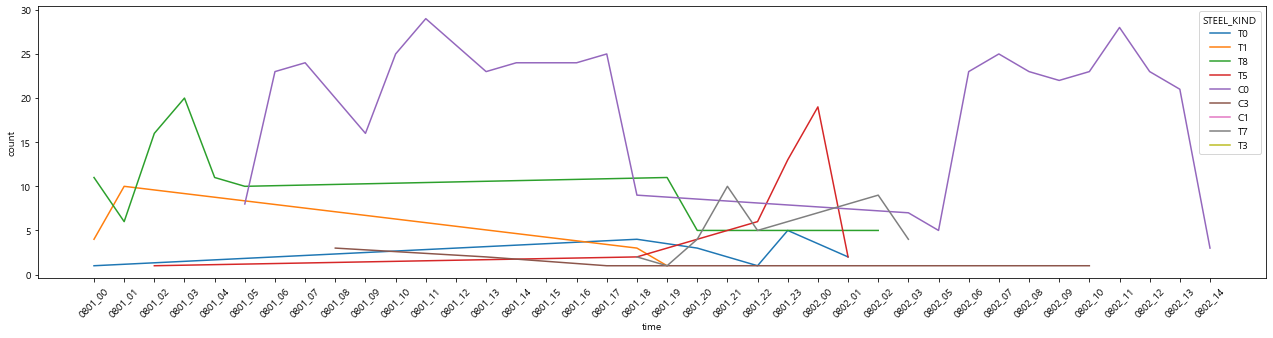

In [ ]:
plt.figure(figsize =(22,5)) 
plt.xticks(rotation = 45)
sns.lineplot(data = date_time_n, x = 'time' , y = 'count' , hue = 'STEEL_KIND')

<AxesSubplot:xlabel='time', ylabel='count'>

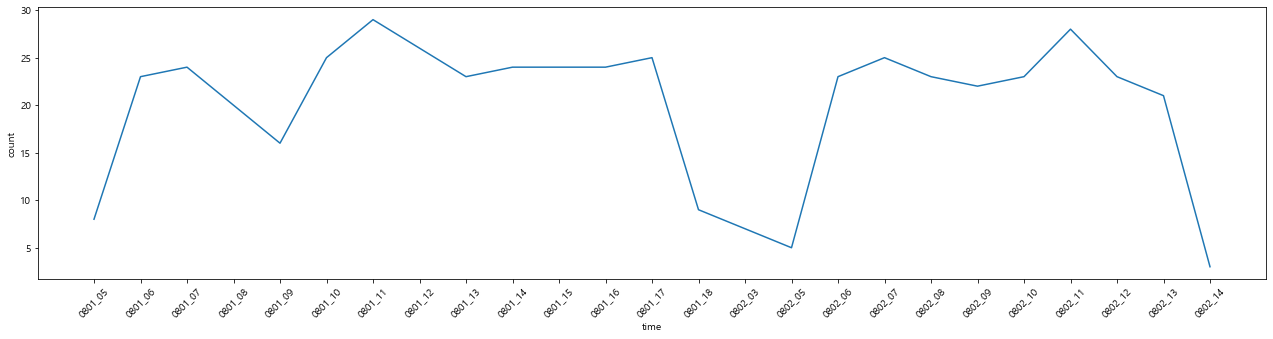

In [ ]:
# 제작일자별 C0 카운트 
plt.figure(figsize =(22,5)) 
plt.xticks(rotation = 45)
sns.lineplot(data = date_time_C0, x = 'time' , y = 'count')

## HZ_TEMP

In [ ]:
# HZ가열로_온도별 불량 카운트
data_HZ_TEMP = data.groupby(['SCALE','FUR_HZ_TEMP'], as_index = False).agg(count = ('SCALE', 'count'))
data_HZ_TEMP 

,SCALE,FUR_HZ_TEMP,count
0,불량,1115,2
1,불량,1123,1
2,불량,1124,1
3,불량,1127,1
4,불량,1128,1
...,...,...,...
159,양품,1191,1
160,양품,1192,5
161,양품,1195,2
162,양품,1196,1


<AxesSubplot:xlabel='data_HZ_TEMP', ylabel='count'>

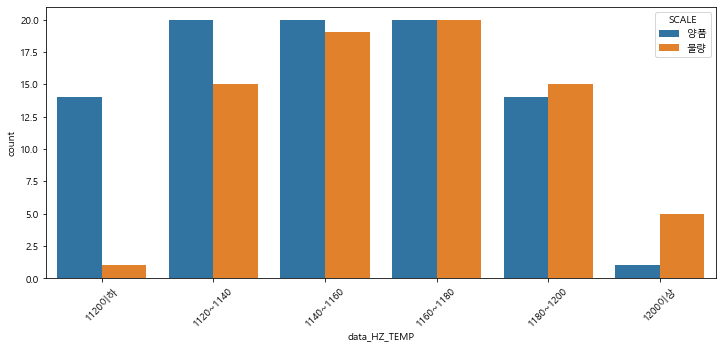

In [ ]:
def Total_1(data_HZ_TEMP):
    if data_HZ_TEMP < 1120:        
        return '1120이하'
    elif data_HZ_TEMP < 1140:
        return '1120~1140'
    elif data_HZ_TEMP < 1160:
        return '1140~1160'
    elif data_HZ_TEMP < 1180:
        return '1160~1180'
    elif data_HZ_TEMP < 1200:
        return '1180~1200'
    else:
        return '1200이상'
plt.rc('font', family='Malgun Gothic')    # 한글 폰트수정
plt.figure(figsize = (12, 5))  # 피규어 사이즈 확장 
plt.xticks(rotation=45)  # x라벨이 겹쳐서 글자 회전
data_HZ_TEMP['data_HZ_TEMP'] = data_HZ_TEMP['FUR_HZ_TEMP'].apply(Total_1)
data_HZ_TEMP = data_HZ_TEMP.sort_values('data_HZ_TEMP')
sns.countplot(data = data_HZ_TEMP, x='data_HZ_TEMP', hue = 'SCALE',order=['1120이하','1120~1140','1140~1160','1160~1180','1180~1200','1200이상'])

## HZ_TIME

In [ ]:
# 데이터 범위확인
data['FUR_HZ_TIME'].sort_values() #최소 43 최대 312

28      43
656     45
660     46
361     48
286     49
      ... 
563    245
552    249
562    251
548    308
549    312
Name: FUR_HZ_TIME, Length: 720, dtype: int64

<AxesSubplot:xlabel='시간(HZ)', ylabel='count'>

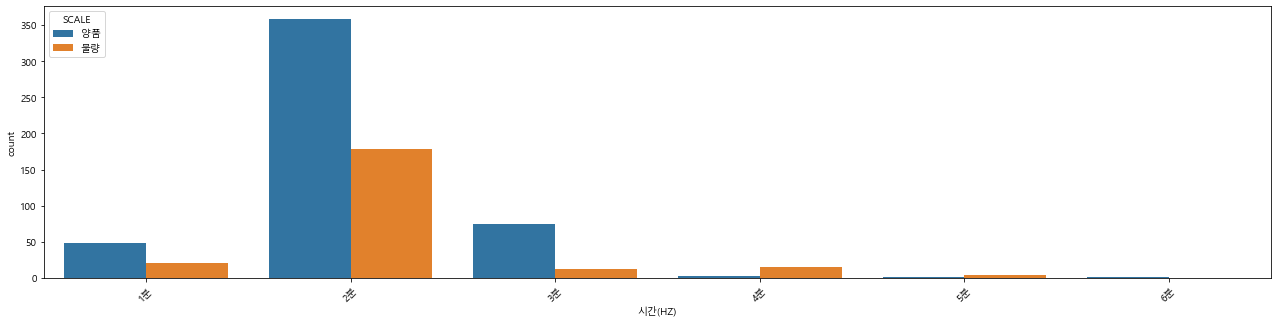

In [ ]:
 def time_split(data):
    if data < 60:
        return '1분'
    elif data < 120:
        return '2분'
    elif data < 180:
        return '3분'
    elif data < 240:
        return '4분'
    elif data < 300:
        return '5분'
    else:
        return '6분'   
data['시간(HZ)'] = data['FUR_HZ_TIME'].apply(time_split)

plt.figure(figsize =(22,5)) 
plt.xticks(rotation = 45)
data['시간(HZ)'].sort_values(ascending = False)
sns.countplot(data = data, x = '시간(HZ)',hue = 'SCALE',order = ['1분','2분','3분','4분', '5분','6분'])

## SZ_TEMP

In [ ]:
# 데이터 범위 확인  
data['FUR_SZ_TEMP'].sort_values() #최소 1113 최대 1185

499    1113
470    1116
20     1116
418    1116
464    1116
       ... 
364    1183
374    1184
373    1184
358    1185
372    1185
Name: FUR_SZ_TEMP, Length: 720, dtype: int64

In [ ]:
data_FUR_SZ_TEMP = data.groupby(['SCALE','FUR_SZ_TEMP'], as_index = False).agg(count = ('SCALE', 'count'))

In [ ]:
def TEMP(data_FUR_SZ_TEMP):
    if data_FUR_SZ_TEMP < 1120:
        return '1120이하'
    elif data_FUR_SZ_TEMP < 1140:
        return '1120~1140'
    elif data_FUR_SZ_TEMP < 1160:
        return '1140~1160'
    elif data_FUR_SZ_TEMP < 1180:
        return '1160~1180'
    else:
        return '1180이상'
        

<AxesSubplot:xlabel='FUR_SZ_TEMP', ylabel='count'>

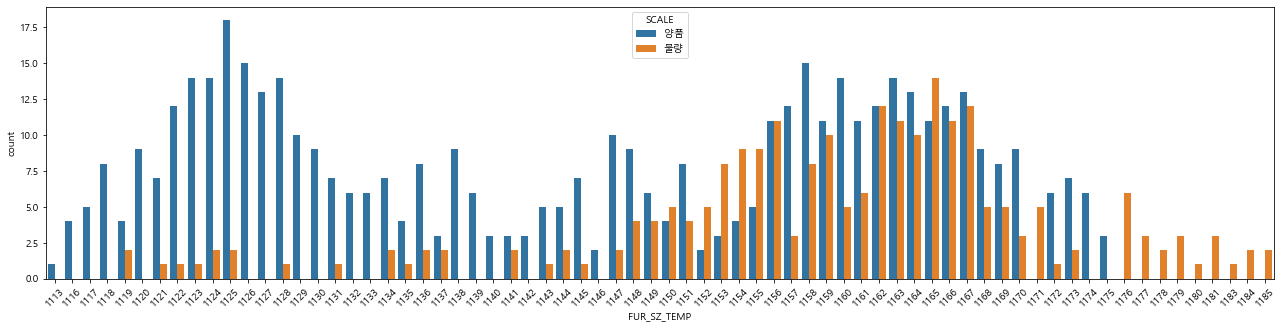

In [ ]:
plt.figure(figsize =(22,5)) 
plt.xticks(rotation = 45)
sns.countplot(data = data, x = 'FUR_SZ_TEMP', hue = 'SCALE')

## HZ_TIME

In [ ]:
# 데이터 범위확인
data['FUR_SZ_TIME'].sort_values() #최소 35 최대 294

249     35
569     37
230     38
225     40
629     41
      ... 
526    231
527    238
528    242
532    246
524    294
Name: FUR_SZ_TIME, Length: 720, dtype: int64

<AxesSubplot:xlabel='시간(SZ)', ylabel='count'>

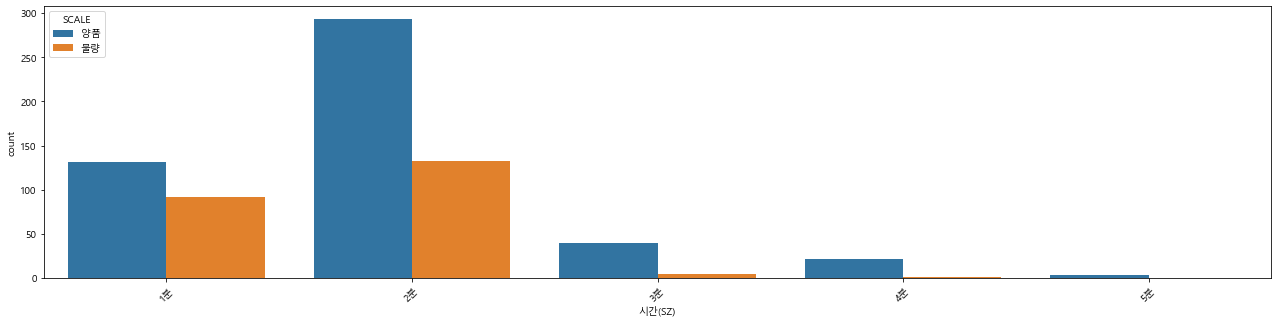

In [ ]:
data['시간(SZ)'] = data['FUR_SZ_TIME'].apply(time_split)
plt.figure(figsize =(22,5)) 
plt.xticks(rotation = 45)
data['시간(SZ)'].sort_values(ascending = False)
sns.countplot(data = data, x = '시간(SZ)',hue = 'SCALE')

## EXTEMP

In [ ]:
# 데이터 범위 확인  
data['FUR_EXTEMP'].sort_values() #최소 1113 최대 1185

499    1113
470    1116
20     1116
418    1116
464    1116
       ... 
364    1183
374    1184
373    1184
358    1185
372    1185
Name: FUR_EXTEMP, Length: 720, dtype: int64

<AxesSubplot:xlabel='FUR_EXTEMP', ylabel='count'>

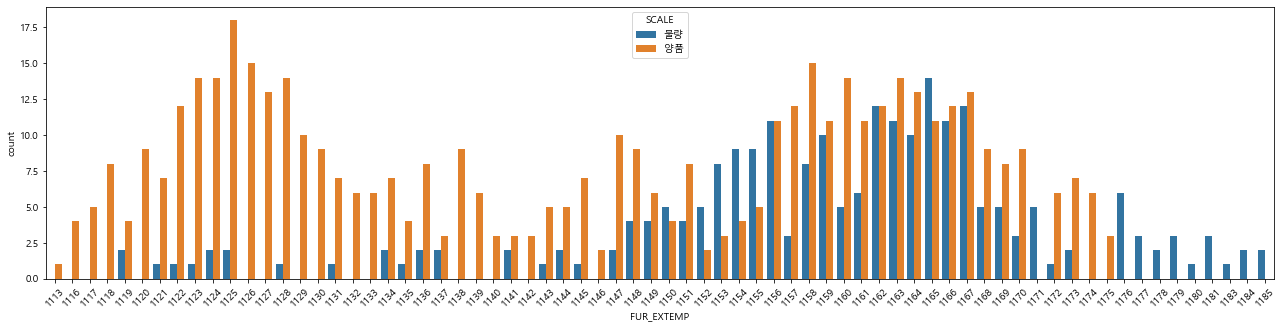

In [ ]:
data_EXTEMP = data.groupby(['SCALE','FUR_EXTEMP'], as_index = False).agg(count = ('SCALE', 'count'))
plt.figure(figsize =(22,5)) 
plt.xticks(rotation = 45)
sns.barplot(data = data_EXTEMP, x = 'FUR_EXTEMP' , y = 'count' , hue = 'SCALE')

## PT_LTH

In [ ]:
# 길이별 불량 카운트
data_PT_LTH = data.groupby(['SCALE','PT_LTH'], as_index = False).agg(count = ('SCALE', 'count'))
data_PT_LTH

,SCALE,PT_LTH,count
0,불량,9175,1
1,불량,9249,1
2,불량,9547,2
3,불량,9753,1
4,불량,10409,1
...,...,...,...
532,양품,54853,1
533,양품,54862,1
534,양품,54883,1
535,양품,54906,1


<AxesSubplot:xlabel='data_PT_LTH', ylabel='count'>

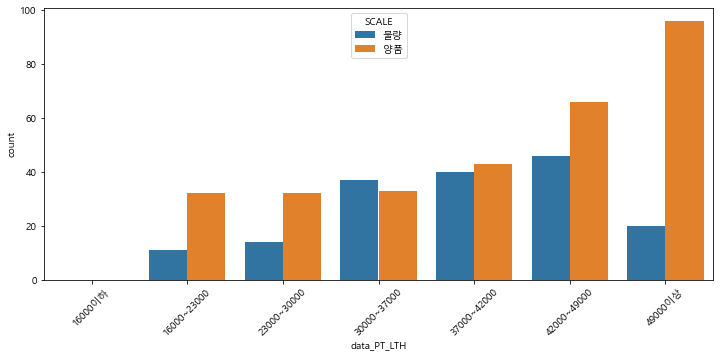

In [ ]:
def Total_11(data_PT_LTH):
    if data_PT_LTH < 16000:
        return '16000'
    elif data_PT_LTH < 23000:
        return '16000~23000'
    elif data_PT_LTH < 30000:
        return '23000~30000'
    elif data_PT_LTH < 37000:
        return '30000~37000'
    elif data_PT_LTH < 42000:
        return '37000~42000'
    elif data_PT_LTH < 49000:
        return '42000~49000'
    else:
        return '49000이상'
plt.rc('font', family='Malgun Gothic') # 한글 폰트수정
plt.figure(figsize = (12, 5)) # 피규어 사이즈 확장
plt.xticks(rotation=45) # x라벨이 겹쳐서 글자 회전
data_PT_LTH['data_PT_LTH'] = data_PT_LTH['PT_LTH'].apply(Total_11)
data_PT_LTH = data_PT_LTH.sort_values('data_PT_LTH')
sns.countplot(data = data_PT_LTH, x='data_PT_LTH', hue = 'SCALE',order=['16000이하','16000~23000','23000~30000','30000~37000','37000~42000','42000~49000','49000이상'])

## PT_WDTH

In [ ]:
# 너비별 불량 카운트
data_WDTH = data.groupby(['SCALE','PT_WDTH'], as_index = False).agg(count = ('SCALE', 'count'))
data['PT_WDTH'].sort_values()

465    1800
461    1800
450    1800
451    1800
406    1800
       ... 
348    4528
349    4528
345    4570
354    4575
355    4575
Name: PT_WDTH, Length: 720, dtype: int64

<AxesSubplot:xlabel='너비', ylabel='count'>

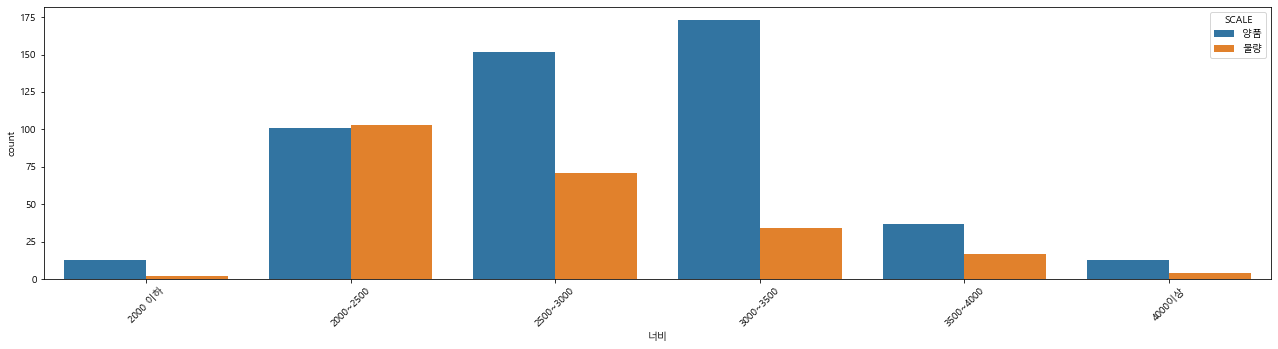

In [ ]:
def WDTH(data):
    if data < 2000:
        return '2000 이하'
    elif data < 2500:
        return '2000~2500'
    elif data < 3000:
        return '2500~3000'
    elif data < 3500:
        return '3000~3500'
    elif data < 4000:
        return '3500~4000'
    else:
        return '4000이상'
data['너비'] = data['PT_WDTH'].apply(WDTH)
plt.figure(figsize =(22,5)) 
plt.xticks(rotation = 45)
data['너비'].sort_values(ascending = False)
sns.countplot(data = data, x = '너비',hue = 'SCALE', order = ['2000 이하','2000~2500','2500~3000','3000~3500', '3500~4000','4000이상'])

## PT_THK


In [ ]:
# 두께별 불량 카운트
data_PT_THK = data.groupby(['SCALE','PT_THK'], as_index = False).agg(count = ('SCALE', 'count'))   
data_PT_THK

,SCALE,PT_THK,count
0,불량,12.05,2
1,불량,12.55,1
2,불량,12.56,1
3,불량,12.80,1
4,불량,13.04,1
...,...,...,...
203,양품,76.91,3
204,양품,80.82,3
205,양품,80.83,1
206,양품,83.32,1


<AxesSubplot:xlabel='data_PT_THK', ylabel='count'>

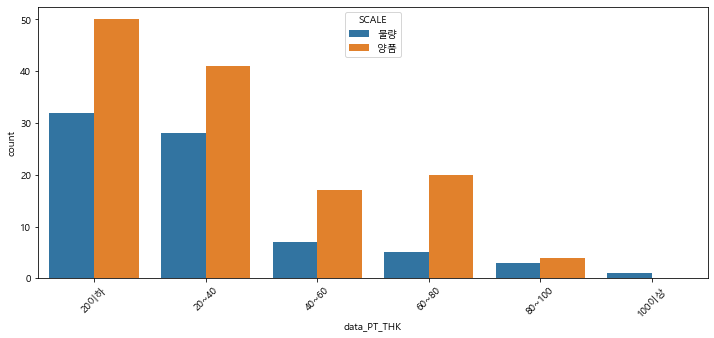

In [ ]:
def Total_1(data_PT_THK):
    if data_PT_THK < 20:        
        return '20이하'
    elif data_PT_THK < 40:
        return '20~40'
    elif data_PT_THK < 60:
        return '40~60'
    elif data_PT_THK < 80:
        return '60~80'
    elif data_PT_THK < 100:
        return '80~100'
    else:
        return '100이상'
plt.rc('font', family='Malgun Gothic')    # 한글 폰트수정
plt.figure(figsize = (12, 5))  # 피규어 사이즈 확장 
plt.xticks(rotation=45)  # x라벨이 겹쳐서 글자 회전
data_PT_THK['data_PT_THK'] = data_PT_THK['PT_THK'].apply(Total_1)
data_PT_THK = data_PT_THK.sort_values('data_PT_THK')
sns.countplot(data = data_PT_THK, x='data_PT_THK', hue = 'SCALE',order=['20이하','20~40','40~60','60~80','80~100','100이상'])

## PT_WGT

In [ ]:
# 무게별 불량 카운트
data_wgt = data.groupby(['SCALE','PT_WGT'],as_index = False).agg(count = ('SCALE','count'))
data_wgt

,SCALE,PT_WGT,count
0,불량,10670,1
1,불량,13460,1
2,불량,13770,1
3,불량,13840,1
4,불량,13980,1
...,...,...,...
471,양품,91850,8
472,양품,93050,6
473,양품,95900,1
474,양품,96900,2


<AxesSubplot:xlabel='data_wgt', ylabel='count'>

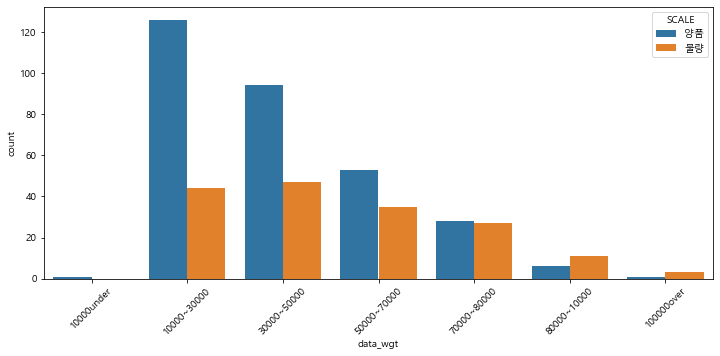

In [ ]:
def Total_1(data_wgt):
 if data_wgt < 10000:
   return '10000under'
 elif data_wgt < 30000:
   return '10000~30000'
 elif data_wgt < 50000:
   return '30000~50000'
 elif data_wgt < 70000:
  return '50000~70000'
 elif data_wgt < 90000:
  return '70000~80000'
 elif data_wgt < 100000:
  return '80000~10000'
 else:
  return '100000over'
plt.rc('font', family='Malgun Gothic') # 한글 폰트수정
plt.figure(figsize = (12, 5)) # 피규어 사이즈 확장
plt.xticks(rotation=45) # x라벨이 겹쳐서 글자 회전
data_wgt['data_wgt'] = data_wgt['PT_WGT'].apply(Total_1)
data_wgt = data_wgt.sort_values('data_wgt')
sns.countplot(data = data_wgt, x='data_wgt', hue = 'SCALE',order=['10000under','10000~30000','30000~50000','50000~70000','70000~80000','80000~10000','100000over'])

## 기타

<AxesSubplot:xlabel='STEEL_KIND', ylabel='count'>

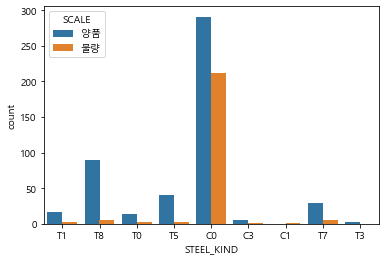

In [ ]:
# 종류별 불량율
sns.countplot(data = data , x = 'STEEL_KIND', hue = 'SCALE' )

<AxesSubplot:xlabel='SCALE', ylabel='count'>

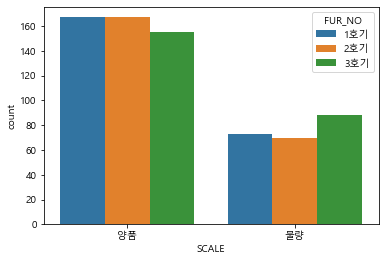

In [ ]:
# 생산시설넘버별 불량율
sns.countplot(data = data, x= 'SCALE',hue = 'FUR_NO')

# 군집

##후판별 제원값 클러스터 모델

In [ ]:
data_clustering = data[['PT_THK','PT_WDTH','PT_LTH','PT_WGT']]
data_clustering.head(10)

,PT_THK,PT_WDTH,PT_LTH,PT_WGT
0,32.25,3707,15109,14180
1,32.25,3707,15109,14180
2,33.27,3619,19181,18130
3,33.27,3619,19181,18130
4,38.33,3098,13334,12430
5,38.33,3098,13334,12430
6,38.33,3099,16719,15590
7,38.33,3099,16719,15590
8,38.33,3099,16719,15590
9,38.43,3129,16187,15280


In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [ ]:
sc = MinMaxScaler()
data_clustering_sc = sc.fit_transform(data_clustering)
kmeans = KMeans(n_clusters = 4, random_state = 0)
clusters = kmeans.fit(data_clustering_sc)
data_clustering.loc[:,'cluster'] = clusters.labels_
data_clustering

C:\Users\user\AppData\Local\Temp\ipykernel_6132\3436285949.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clustering.loc[:,'cluster'] = clusters.labels_


,PT_THK,PT_WDTH,PT_LTH,PT_WGT,cluster
0,32.25,3707,15109,14180,0
1,32.25,3707,15109,14180,0
2,33.27,3619,19181,18130,0
3,33.27,3619,19181,18130,0
4,38.33,3098,13334,12430,0
...,...,...,...,...,...
715,20.14,3580,38639,21870,1
716,15.08,3212,48233,18340,1
717,16.60,3441,43688,19590,1
718,15.59,3363,48740,80240,2


In [ ]:
from sklearn.decomposition import PCA
x = data_clustering_sc 
pca = PCA(n_components = 2)
pca.fit(x)
x_pca = pca.transform(x)
pca_df = pd.DataFrame(x_pca)
pca_df ['cluster'] = data_clustering['cluster']

c:\ProgramData\Anaconda3\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
c:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


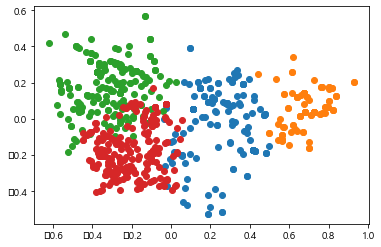

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
for i in data_clustering['cluster'].unique():
    tmp = pca_df.loc[pca_df['cluster'] == i]
    plt.scatter(tmp[0],tmp[1])

In [ ]:
data_clustering.groupby('cluster').count()

,PT_THK,PT_WDTH,PT_LTH,PT_WGT
cluster,,,,
0,167,167,167,167
1,239,239,239,239
2,209,209,209,209
3,105,105,105,105


In [ ]:
data_clustering.groupby('cluster').mean()

,PT_THK,PT_WDTH,PT_LTH,PT_WGT
cluster,,,,
0,35.739754,2789.580838,23474.113772,30495.389222
1,16.447908,2879.351464,44156.640167,30431.966527
2,18.966842,2841.066986,43020.531100,74334.449761
3,68.659029,2603.085714,11884.276190,18714.380952


##온도,시간

In [ ]:
steel_data_clustering = data[['FUR_HZ_TEMP','FUR_HZ_TIME','FUR_SZ_TEMP','FUR_SZ_TIME','FUR_TIME','FUR_EXTEMP']]
steel_data_clustering.head()

,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP
0,1144,116,1133,59,282,1133
1,1144,122,1135,53,283,1135
2,1129,116,1121,55,282,1121
3,1152,125,1127,68,316,1127
4,1140,134,1128,48,314,1128


In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

# 스케일 변환
scaler = MinMaxScaler()
steel_data_clustering_std = scaler.fit_transform(steel_data_clustering)

# 군집
kmeans = KMeans(n_clusters = 6)
kmeans.fit(steel_data_clustering_std)

# 생성 된 클러스터를 데이터 프레임에 넣습니다.
clusters = kmeans.labels_
steel_data_clustering.copy().loc[:, 'cluster'] = clusters

In [1]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2) #2차원으로 변환하라는 코딩
pca.fit(steel_data_clustering_std)

NameError: ignored

In [ ]:
pca_df = pd.DataFrame(pca.transform(steel_data_clustering_std), columns = ['X','Y'])
pca_df.loc[:,'cluster'] = clusters
pca_df.head(1)

In [ ]:
import seaborn as sns
sns.scatterplot(data = pca_df, x = 'X', y = 'Y', hue = 'cluster')

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [ ]:
import matplotlib.pyplot as plt

label = ['양품', '불량']
pop = [489, 231]
wg = {'edgecolor' : 'B'}

plt.pie(pop, labels = label, autopct = '%.1f%%',
        startangle = 90)

# 머신러닝

## RandomForest

In [ ]:
# x,y 데이터 지정
x = data[['FUR_HZ_TEMP','FUR_HZ_TIME','FUR_SZ_TEMP','FUR_SZ_TIME','FUR_TIME','FUR_EXTEMP','ROLLING_TEMP_T5']]
y = data['SCALE']
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y, random_state = 0)

In [ ]:
# 스케일불러오기&지정 
from sklearn.preprocessing import StandardScaler
std_scale = StandardScaler()
std_scale.fit(x_train)
x_train_std = std_scale.transform(x_train)
x_test_std = std_scale.transform(x_test)
from sklearn.ensemble import RandomForestClassifier
clf_rf = RandomForestClassifier(max_depth = 10, random_state = 0)
clf_rf.fit(x_train_std, y_train)
pred_rf =clf_rf.predict(x_test_std)

In [ ]:
# 테스트정확도 확인
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test,pred_rf)
print(accuracy)

0.9222222222222223


In [ ]:
# y_test 매트릭스 생성
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test,pred_rf)
print(conf_matrix)

[[ 40  14]
 [  0 126]]


In [ ]:
# 테스트값 리포트
from sklearn.metrics import classification_report
class_report = classification_report(y_test, pred_rf)
print(class_report)

              precision    recall  f1-score   support

          불량       1.00      0.74      0.85        54
          양품       0.90      1.00      0.95       126

    accuracy                           0.92       180
   macro avg       0.95      0.87      0.90       180
weighted avg       0.93      0.92      0.92       180



In [ ]:
# 스케일 지정
scaler = StandardScaler()
scaler.fit(x_train)
x_train_std = scaler.transform(x_train)
x_test_std = scaler.transform(x_test)

In [ ]:
clf_rf = RandomForestClassifier(max_depth = 3, n_estimators = 100)
clf_rf.fit(x_train_std,y_train)

RandomForestClassifier(max_depth=3)

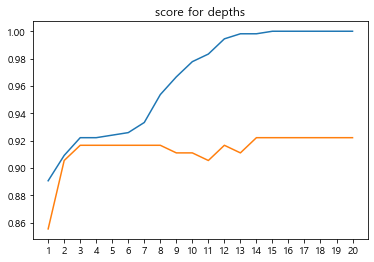

In [ ]:
# depth에따른 정확도 
train_score=[]
test_score=[]
for i in range(1,21):
    model=RandomForestClassifier(max_depth=i,random_state=4)
    model.fit(x_train,y_train)
    train_score.append(model.score(x_train,y_train))
    test_score.append(model.score(x_test,y_test))
plt.figure()
plt.title('score for depths')
plt.plot(range(1,21),train_score)
plt.plot(range(1,21),test_score)
plt.xticks(range(1,21))
plt.show()

In [ ]:
# 최적의 max_depth=3으로 지정
model_3=RandomForestClassifier(max_depth=3,random_state=4)
model_3.fit(x_train,y_train)
train_accuracy_3 = model_3.score(x_train, y_train)
test_accuracy_3 = model_3.score(x_test, y_test)
print(f'훈련 정확도는 : {train_accuracy_3}, 테스트 정확도는 {test_accuracy_3} 입니다.')

훈련 정확도는 : 0.9222222222222223, 테스트 정확도는 0.9166666666666666 입니다.


## Gradient Boosting


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

X = data[['FUR_HZ_TEMP', 'FUR_HZ_TIME','FUR_SZ_TEMP','FUR_SZ_TIME','FUR_TIME','FUR_EXTEMP','ROLLING_TEMP_T5']] # input data
y = data['SCALE'] # target data

x_train, x_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)

# 모델설정
model = GradientBoostingClassifier(max_depth = 2, random_state = 5)
model.fit(x_train, y_train)

y_test_prediction = model.predict(x_test)
pred_grb = model.predict(x_test)

train_accuracy = model.score(x_train, y_train)
test_accuracy = model.score(x_test, y_test)
      

conf_matrix = confusion_matrix(y_test, pred_grb)
print(conf_matrix)

class_report = classification_report(y_test, pred_grb)
print(class_report)

[[ 39   5]
 [  0 100]]
              precision    recall  f1-score   support

          불량       1.00      0.89      0.94        44
          양품       0.95      1.00      0.98       100

    accuracy                           0.97       144
   macro avg       0.98      0.94      0.96       144
weighted avg       0.97      0.97      0.96       144



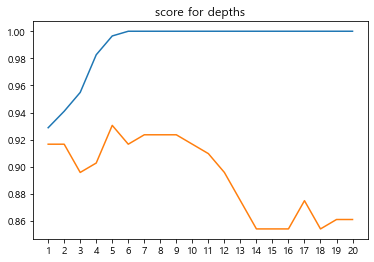

In [ ]:
# depth에따른 정확도 
train_score=[]
test_score=[]
for i in range(1,21):
    model = GradientBoostingClassifier(max_depth=i,random_state=5)
    model.fit(x_train,y_train)
    train_score.append(model.score(x_train,y_train))
    test_score.append(model.score(x_test,y_test))
plt.figure()
plt.title('score for depths')
plt.plot(range(1,21),train_score)
plt.plot(range(1,21),test_score)
plt.xticks(range(1,21))
plt.show()

In [ ]:
print(f'훈련 정확도는 : {train_accuracy}\n테스트 정확도는 {test_accuracy}입니다.')

훈련 정확도는 : 0.9409722222222222
테스트 정확도는 0.9166666666666666입니다.


## Decision Tree


In [ ]:
# SCALE 데이터 정수화
def df1(data):
    if data == '양품':
        return 1
    else:
        return 0    
data['SCALE_1'] = data['SCALE'].apply(df1)
data

,PLATE_NO,ROLLING_DATE,SCALE,SPEC,STEEL_KIND,PT_THK,PT_WDTH,PT_LTH,PT_WGT,FUR_NO,...,HSB,ROLLING_DESCALING,WORK_GR,날짜,시간,time,시간(HZ),시간(SZ),너비,SCALE_1
0,PB562774,2008-08-01 00:00:15,양품,AB/EH32-TM,T1,32.25,3707,15109,14180,1호기,...,적용,8,2조,20080801,00:00:15,0801_00,2분,1분,3500~4000,1
1,PB562775,2008-08-01 00:00:16,양품,AB/EH32-TM,T1,32.25,3707,15109,14180,1호기,...,적용,8,2조,20080801,00:00:16,0801_00,3분,1분,3500~4000,1
2,PB562776,2008-08-01 00:00:59,양품,NV-E36-TM,T8,33.27,3619,19181,18130,2호기,...,적용,8,3조,20080801,00:00:59,0801_00,2분,1분,3500~4000,1
3,PB562777,2008-08-01 00:01:24,양품,NV-E36-TM,T8,33.27,3619,19181,18130,2호기,...,적용,8,3조,20080801,00:01:24,0801_00,3분,2분,3500~4000,1
4,PB562778,2008-08-01 00:01:44,양품,BV-EH36-TM,T8,38.33,3098,13334,12430,3호기,...,적용,8,1조,20080801,00:01:44,0801_00,3분,1분,3000~3500,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,PB563502,2008-08-02 13:35:36,불량,NK-KA,C0,20.14,3580,38639,21870,3호기,...,적용,8,2조,20080802,13:35:36,0802_13,2분,2분,3500~4000,0
716,PB563503,2008-08-02 13:35:02,양품,NV-A32,C0,15.08,3212,48233,18340,2호기,...,적용,10,1조,20080802,13:35:02,0802_13,2분,2분,3000~3500,1
717,PB563504,2008-08-02 14:40:00,양품,NV-A32,C0,16.60,3441,43688,19590,2호기,...,적용,10,4조,20080802,14:40:00,0802_14,2분,2분,3000~3500,1
718,PB563505,2008-08-02 13:35:19,양품,LR-A,C0,15.59,3363,48740,80240,3호기,...,적용,10,2조,20080802,13:35:19,0802_13,2분,1분,3000~3500,1


In [ ]:
# 데이터 지정
data_1 = data[['FUR_HZ_TEMP','FUR_HZ_TIME','FUR_SZ_TEMP','FUR_SZ_TIME','FUR_TIME','FUR_EXTEMP','ROLLING_TEMP_T5','SCALE_1']]
data_1

,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,ROLLING_TEMP_T5,SCALE_1
0,1144,116,1133,59,282,1133,934,1
1,1144,122,1135,53,283,1135,937,1
2,1129,116,1121,55,282,1121,889,1
3,1152,125,1127,68,316,1127,885,1
4,1140,134,1128,48,314,1128,873,1
...,...,...,...,...,...,...,...,...
715,1172,72,1164,62,245,1164,1005,0
716,1150,61,1169,61,238,1169,947,1
717,1169,65,1163,77,247,1163,948,1
718,1179,86,1163,45,243,1163,940,1


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

df1 = data_1[data_1['SCALE_1'] == 1]
df2 = data_1[data_1['SCALE_1'] == 0]
concat_data = pd.concat([df1, df2])

X = concat_data.drop(['SCALE_1'], axis = 1)
Y = concat_data['SCALE_1'].ravel()

X_train, X_test, Y_train, Y_test = train_test_split(
    X,Y, test_size = 0.3, random_state = 0)

model = DecisionTreeClassifier()
model.fit(X_train, Y_train)

train_accuracy = model.score(X_train, Y_train)
test_accuracy = model.score(X_test, Y_test)
print(f'훈련 정확도 : {train_accuracy}')
print(f'테스트 정확도 : {test_accuracy}')

훈련 정확도 : 1.0
테스트 정확도 : 0.8472222222222222


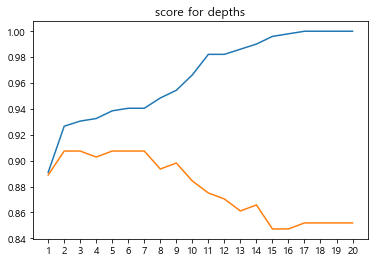

In [ ]:
# depth에 따른 정확도
train_score=[]
test_score=[]
for i in range(1,21):
    
    model=DecisionTreeClassifier(max_depth=i,random_state=4)
    model.fit(X_train,Y_train)
    train_score.append(model.score(X_train,Y_train))
    test_score.append(model.score(X_test,Y_test))
plt.figure()
plt.title('score for depths')
plt.plot(range(1,21),train_score)
plt.plot(range(1,21),test_score)
plt.xticks(range(1,21))
plt.show()

In [ ]:
# 최적depth=2 지정
model_none_overfitting = DecisionTreeClassifier(max_depth = 2)
model_none_overfitting.fit(X_train, Y_train)
train_accuracy = model_none_overfitting.score(X_train, Y_train)
test_accuracy = model_none_overfitting.score(X_test, Y_test)
print(f'훈련 정확도 : {train_accuracy}')
print(f'테스트 정확도 : {test_accuracy}')

훈련 정확도 : 0.9265873015873016
테스트 정확도 : 0.9074074074074074


In [ ]:
# 중요 인자 확인
import matplotlib.pyplot as plt
import numpy as np

importance = model_none_overfitting.feature_importances_
importance


array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.18382234, 0.81617766])

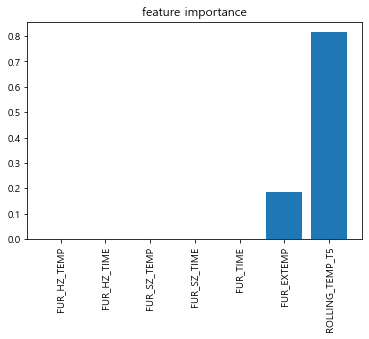

In [ ]:
plt.figure()
plt.title('feature importance')
plt.bar(range(len(importance)), importance)
plt.xticks(range(len(importance)), X.columns, rotation = 90)
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_6132\3425698141.py:4: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats("retina")


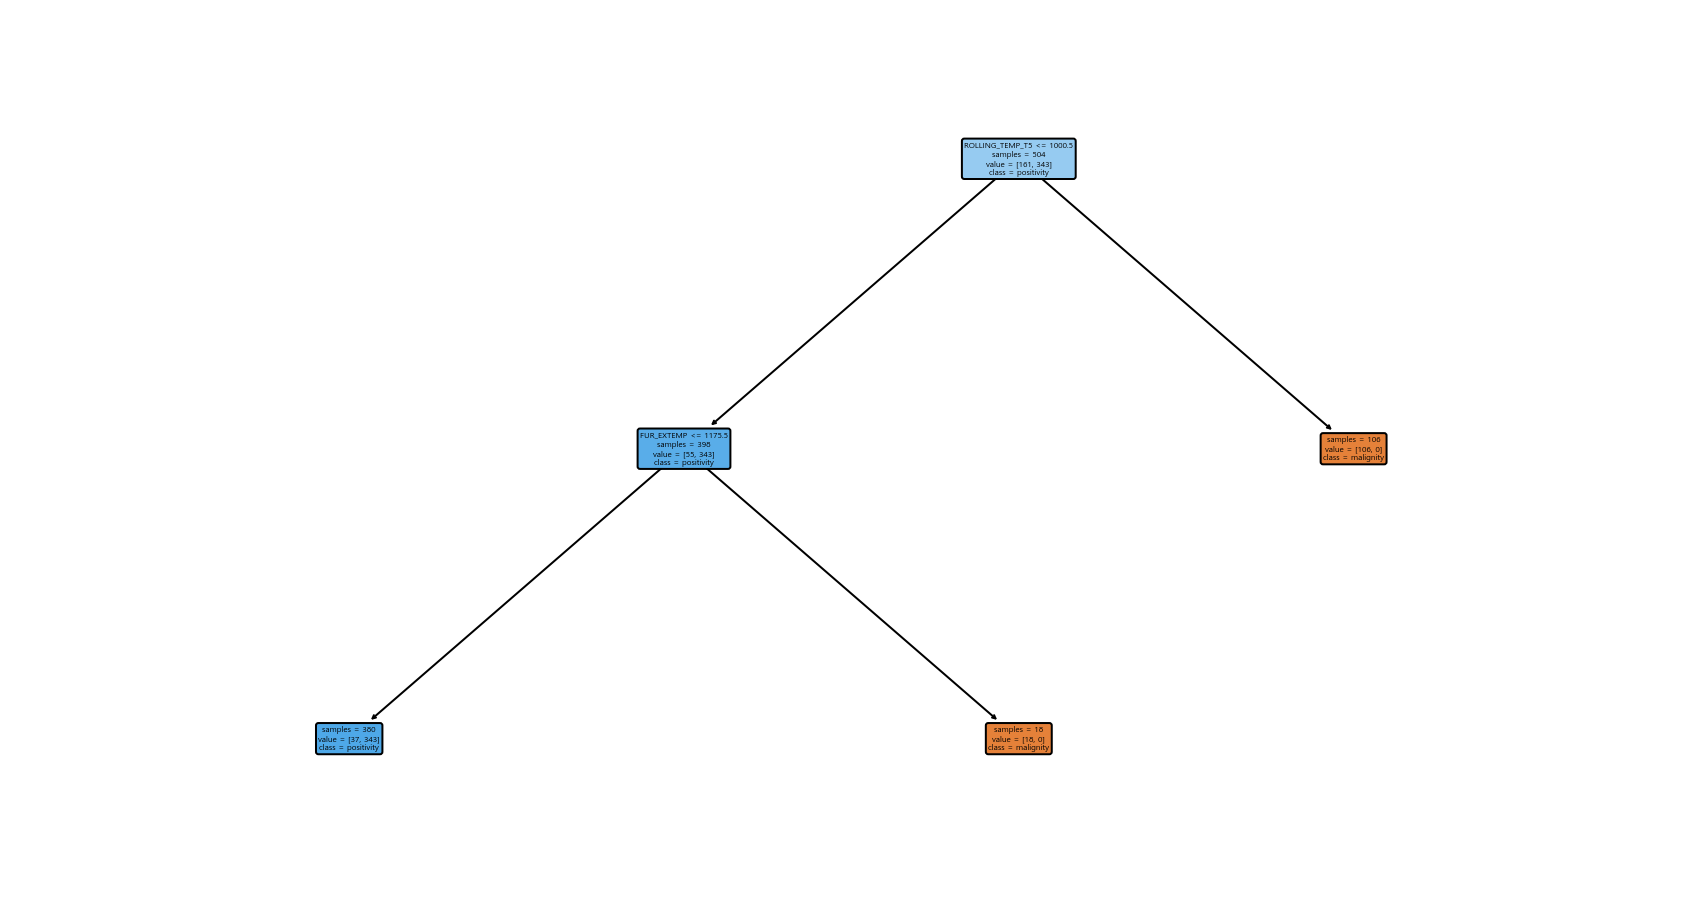

In [ ]:
# 트리생성, 그리기
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")
plt.rcParams['figure.figsize'] = [15,8]

plot_tree(model_none_overfitting, class_names=["malignity", "positivity"],
          feature_names=model_none_overfitting.feature_names_in_,
         impurity=False, filled=True, rounded=True, fontsize=4)

plt.show()

In [ ]:
model_none_overfitting.feature_names_in_

array(['FUR_HZ_TEMP', 'FUR_HZ_TIME', 'FUR_SZ_TEMP', 'FUR_SZ_TIME',
       'FUR_TIME', 'FUR_EXTEMP', 'ROLLING_TEMP_T5'], dtype=object)

In [ ]:
#임의값 지정후 확인
import numpy as np
input_data = np.array([1144,116,1133,59,282,1133,934]).reshape(1, -1)
model_none_overfitting.predict(input_data)

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)